Initial Dataset:
   EEG.Counter  POW.AF3.Theta  POW.AF3.Alpha  POW.AF3.BetaL  POW.AF3.BetaH  \
0            7     166.731949     185.948425      83.323044      73.601540   
1           23     228.054886     187.697632     133.199661      72.267303   
2           39     319.860626     190.380814     195.757156      72.039673   
3           55     420.209229     195.261124     251.075974      72.354744   
4           71     499.546143     203.557037     279.163635      71.266541   

   POW.AF3.Gamma  POW.F7.Theta  POW.F7.Alpha  POW.F7.BetaL  POW.F7.BetaH  ...  \
0      44.967148      2.736741      1.990821      0.159851      0.665183  ...   
1      39.831268      2.774523      1.690782      0.145659      0.644086  ...   
2      35.989494      2.912924      1.361397      0.174412      0.596025  ...   
3      32.792446      3.110032      1.055174      0.219757      0.524991  ...   
4      29.780571      3.425482      0.861140      0.275021      0.449877  ...   

   POW.F8.Theta  POW.F8.Alp

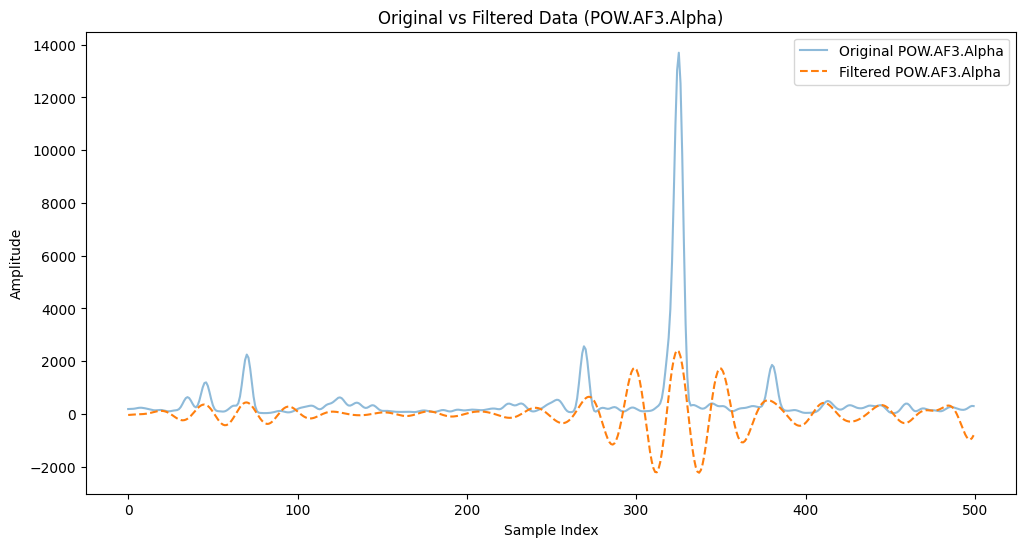

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Preprocessed data saved to preprocessed_power_spectrum_data_Arihant.csv


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Step 1: Load the EEG Data
file_path = '/content/drive/MyDrive/Arihant_A_PSD.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display the initial dataset
print("Initial Dataset:")
print(data.head())
print("\nColumns:", data.columns)

# Step 2: Define a Bandpass Filter Function
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    """
    Apply a Butterworth bandpass filter to the data.
    :param data: 1D array-like data to filter
    :param lowcut: Lower bound of the frequency range
    :param highcut: Upper bound of the frequency range
    :param fs: Sampling frequency
    :param order: Order of the filter
    :return: Filtered data
    """
    nyquist = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Step 3: Identify Columns for Preprocessing
channels_columns = data.columns[1:]  # Exclude the first column (EEG.Counter)

# Sampling frequency (replace with your actual EEG sampling rate)
fs = 250  # Example value in Hz

# Step 4: Apply Bandpass Filter to Each Column
filtered_data = data.copy()

for column in channels_columns:
    # Parse the band information from the column name (e.g., "POW.AF3.Theta")
    band = column.split('.')[-1]

    # Define frequency ranges for different bands
    if band == "Theta":
        lowcut, highcut = 4, 8
    elif band == "Alpha":
        lowcut, highcut = 8, 12
    elif band == "BetaL":
        lowcut, highcut = 12, 20
    elif band == "BetaH":
        lowcut, highcut = 20, 30
    elif band == "Gamma":
        lowcut, highcut = 30, 50
    else:
        # Skip unexpected column names
        print(f"Skipping column: {column} (No valid band information)")
        continue

    # Apply the bandpass filter to the column
    print(f"Filtering {column} for {band} band with range {lowcut}-{highcut} Hz")
    filtered_data[column] = bandpass_filter(data[column].values, lowcut, highcut, fs)

# Step 5: Save the Preprocessed Data
output_file = 'preprocessed_power_spectrum_data_Arihant.csv'
filtered_data.to_csv(output_file, index=False)


# Step 6: Visualize the Original vs Filtered Data for a Sample Channel (Optional)
sample_channel = "POW.AF3.Alpha"  # Replace with a specific channel and band name

plt.figure(figsize=(12, 6))
plt.plot(data[sample_channel].iloc[:500], label=f"Original {sample_channel}", alpha=0.5)
plt.plot(filtered_data[sample_channel].iloc[:500], label=f"Filtered {sample_channel}", linestyle='dashed')
plt.title(f"Original vs Filtered Data ({sample_channel})")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
from google.colab import files
# Trigger download of the preprocessed file
files.download(output_file)
print(f"Preprocessed data saved to {output_file}")
